# Exploratory Analysis with Significance Tests. Multiple Hypothesis Testing. Handling Missing Data. AdaBoost

We explore two data sets downloadable from the Machine Learning Repository (<http://archive.ics.uci.edu/ml/index.php>)

- Breast Cancer Wisconsin (Diagnostic) Data Set (<https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>)
- Mice Protein Expression Data Set (<https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression>)

## Exploratory Analysis

We will perform an exploratory analysis with Python. You can use the Spyder environment which is already installed on the machines.

You will need to load the following packages:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp as sm

1. Load the Breast Cancer data set using `pd.read table()` (for the Mice Data Set you will `need pd.ExcelFile()`)

In [2]:
BreastCancer = pd.read_table('breast-cancer-wisconsin-fixed.data')
BreastCancer = BreastCancer['Wisconsin Breast Cancer Database (January 8, 1991)'].map(lambda x: x.split(','))

print(BreastCancer)

0      [Sample code number, Clump Thickness, Uniformi...
1                [1000025, 5, 1, 1, 1, 2, 1, 3, 1, 1, 2]
2               [1002945, 5, 4, 4, 5, 7, 10, 3, 2, 1, 2]
3                [1015425, 3, 1, 1, 1, 2, 2, 3, 1, 1, 2]
4                [1016277, 6, 8, 8, 1, 3, 4, 3, 7, 1, 2]
5                [1017023, 4, 1, 1, 3, 2, 1, 3, 1, 1, 2]
6             [1017122, 8, 10, 10, 8, 7, 10, 9, 7, 1, 4]
7               [1018099, 1, 1, 1, 1, 2, 10, 3, 1, 1, 2]
8                [1018561, 2, 1, 2, 1, 2, 1, 3, 1, 1, 2]
9                [1033078, 2, 1, 1, 1, 2, 1, 1, 1, 5, 2]
10               [1033078, 4, 2, 1, 1, 2, 1, 2, 1, 1, 2]
11               [1035283, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2]
12               [1036172, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2]
13               [1041801, 5, 3, 3, 3, 2, 3, 4, 4, 1, 4]
14               [1043999, 1, 1, 1, 1, 2, 3, 3, 1, 1, 2]
15              [1044572, 8, 7, 5, 10, 7, 9, 5, 5, 4, 4]
16               [1047630, 7, 4, 6, 4, 6, 1, 4, 3, 1, 4]
17               [1048672, 4, 1

In [3]:
BreastCancerColumns = BreastCancer[0]
BreastCancer = BreastCancer[1:]

BreastCancer = BreastCancer.map(lambda x: x[1:])
print(BreastCancer)

1             [5, 1, 1, 1, 2, 1, 3, 1, 1, 2]
2            [5, 4, 4, 5, 7, 10, 3, 2, 1, 2]
3             [3, 1, 1, 1, 2, 2, 3, 1, 1, 2]
4             [6, 8, 8, 1, 3, 4, 3, 7, 1, 2]
5             [4, 1, 1, 3, 2, 1, 3, 1, 1, 2]
6          [8, 10, 10, 8, 7, 10, 9, 7, 1, 4]
7            [1, 1, 1, 1, 2, 10, 3, 1, 1, 2]
8             [2, 1, 2, 1, 2, 1, 3, 1, 1, 2]
9             [2, 1, 1, 1, 2, 1, 1, 1, 5, 2]
10            [4, 2, 1, 1, 2, 1, 2, 1, 1, 2]
11            [1, 1, 1, 1, 1, 1, 3, 1, 1, 2]
12            [2, 1, 1, 1, 2, 1, 2, 1, 1, 2]
13            [5, 3, 3, 3, 2, 3, 4, 4, 1, 4]
14            [1, 1, 1, 1, 2, 3, 3, 1, 1, 2]
15           [8, 7, 5, 10, 7, 9, 5, 5, 4, 4]
16            [7, 4, 6, 4, 6, 1, 4, 3, 1, 4]
17            [4, 1, 1, 1, 2, 1, 2, 1, 1, 2]
18            [4, 1, 1, 1, 2, 1, 3, 1, 1, 2]
19          [10, 7, 7, 6, 4, 10, 4, 1, 2, 4]
20            [6, 1, 1, 1, 2, 1, 3, 1, 1, 2]
21          [7, 3, 2, 10, 5, 10, 5, 4, 4, 4]
22          [10, 5, 5, 3, 6, 7, 7, 10, 1, 4]
23        

In [4]:
Mice = pd.read_excel('Data_Cortex_Nuclear.xls')
print(Mice)

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
5        309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
6        309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
7        309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
8        309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
9       309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
10      309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
11      309_12  0.364154  0.499411  0.355124  2.006871  3.466627

In [5]:
# We define 3 variables as vectors MiceColumns, MiceNumericColumns and MiceNonNumericColumns such that:
#  - MiceColumns stores all the column names of my file,
#  - MiceNumericColumns stores all the column names associated with digital measurements and
#  - MiceNonNumericColumns references all column names whose values are not numeric.

# MiceColumns: extract the 1st line of the file which corresponds to the names of the columns
MiceColumns = Mice.columns

# MiceNumericColumns: there are 77 names of columns that correspond to numeric values
MiceNumericColumns = MiceColumns[1:78]

# MiceNonNumericColumns: we concatenate the rest of the columns that contain only text
MiceNonNumericColumns = MiceColumns[0:1].append(MiceColumns[78:82])

print(MiceColumns)

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')


2. Some data sets have missing data. You can impute them by replacing the missing values by median values with `fillna(data, inplace=True)` (you will need to impute data in the Mice Data Set)

In [6]:
# We make a for loop which will allow to impute the missing values with:
#  - the average of the values of the columns containing the numerical values
#  - a "missing" for columns containing missing text

BreastCancerMatrix = []

for x in BreastCancer:
    x = np.array(list(filter(lambda i: i != '?', x))).astype(np.float)
    BreastCancerMatrix.append(x)
    BreastCancer.fillna(np.median(x), inplace=True)
    
print(BreastCancer)

1             [5, 1, 1, 1, 2, 1, 3, 1, 1, 2]
2            [5, 4, 4, 5, 7, 10, 3, 2, 1, 2]
3             [3, 1, 1, 1, 2, 2, 3, 1, 1, 2]
4             [6, 8, 8, 1, 3, 4, 3, 7, 1, 2]
5             [4, 1, 1, 3, 2, 1, 3, 1, 1, 2]
6          [8, 10, 10, 8, 7, 10, 9, 7, 1, 4]
7            [1, 1, 1, 1, 2, 10, 3, 1, 1, 2]
8             [2, 1, 2, 1, 2, 1, 3, 1, 1, 2]
9             [2, 1, 1, 1, 2, 1, 1, 1, 5, 2]
10            [4, 2, 1, 1, 2, 1, 2, 1, 1, 2]
11            [1, 1, 1, 1, 1, 1, 3, 1, 1, 2]
12            [2, 1, 1, 1, 2, 1, 2, 1, 1, 2]
13            [5, 3, 3, 3, 2, 3, 4, 4, 1, 4]
14            [1, 1, 1, 1, 2, 3, 3, 1, 1, 2]
15           [8, 7, 5, 10, 7, 9, 5, 5, 4, 4]
16            [7, 4, 6, 4, 6, 1, 4, 3, 1, 4]
17            [4, 1, 1, 1, 2, 1, 2, 1, 1, 2]
18            [4, 1, 1, 1, 2, 1, 3, 1, 1, 2]
19          [10, 7, 7, 6, 4, 10, 4, 1, 2, 4]
20            [6, 1, 1, 1, 2, 1, 3, 1, 1, 2]
21          [7, 3, 2, 10, 5, 10, 5, 4, 4, 4]
22          [10, 5, 5, 3, 6, 7, 7, 10, 1, 4]
23        

In [7]:
for x in MiceNumericColumns:
    Mice.fillna(Mice[x].median(), inplace=True)

print(Mice)

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
5        309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
6        309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
7        309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
8        309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
9       309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
10      309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
11      309_12  0.364154  0.499411  0.355124  2.006871  3.466627

In [8]:
# Before you can use these data and analyze them statistically, you need to be able to clean
# them by assigning the correct types to the data using astype().

# Indeed, the use of df.types allows us to know all the types of data in all our file and
# we observe after application of this function that all the columns have an object format

In [9]:
#for x in V2:
#    Mice[Mice.columns[x]]=pd.to_numeric(Mice[Mice.columns[x]], errors='coerce')
#    Mice[Mice.columns[x]]=Mice[Mice.columns[x]].astype('float')
#print(type(Mice.columns[1]))

3. Both the Mice data set and the Breast Cancer are binary classification tasks (`M` and `B` are two classes in the Breast Cancer, and `Ts65Dn` and `Control` for the Mice)

In [10]:
BreastCancerMatrix

[array([5., 1., 1., 1., 2., 1., 3., 1., 1., 2.]),
 array([ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.,  2.]),
 array([3., 1., 1., 1., 2., 2., 3., 1., 1., 2.]),
 array([6., 8., 8., 1., 3., 4., 3., 7., 1., 2.]),
 array([4., 1., 1., 3., 2., 1., 3., 1., 1., 2.]),
 array([ 8., 10., 10.,  8.,  7., 10.,  9.,  7.,  1.,  4.]),
 array([ 1.,  1.,  1.,  1.,  2., 10.,  3.,  1.,  1.,  2.]),
 array([2., 1., 2., 1., 2., 1., 3., 1., 1., 2.]),
 array([2., 1., 1., 1., 2., 1., 1., 1., 5., 2.]),
 array([4., 2., 1., 1., 2., 1., 2., 1., 1., 2.]),
 array([1., 1., 1., 1., 1., 1., 3., 1., 1., 2.]),
 array([2., 1., 1., 1., 2., 1., 2., 1., 1., 2.]),
 array([5., 3., 3., 3., 2., 3., 4., 4., 1., 4.]),
 array([1., 1., 1., 1., 2., 3., 3., 1., 1., 2.]),
 array([ 8.,  7.,  5., 10.,  7.,  9.,  5.,  5.,  4.,  4.]),
 array([7., 4., 6., 4., 6., 1., 4., 3., 1., 4.]),
 array([4., 1., 1., 1., 2., 1., 2., 1., 1., 2.]),
 array([4., 1., 1., 1., 2., 1., 3., 1., 1., 2.]),
 array([10.,  7.,  7.,  6.,  4., 10.,  4.,  1.,  2.,  4.]),


4. Find the correlation coefficients between variables with `stats.pearsonr()`. Are there a lot of variables which are strongly correlated? What is the meaning of the sign of the correlation coefficient?

In [11]:
# We can determine whether these variables are highly correlated or not using the properties and interpretation
# of the pearson coefficient. Indeed, we can prove that this coefficient varies between -1 and +1,
# and according to the cases we will have:
#  - absence of linear relationship when the coefficient is close to 0
#  - negative linear relation when the coefficient is close to -1
#  - positive linear relationship when the coefficient is close to +1
# 
# The sign of r indicates the direction of the relation and that the absolute value of r indicates the
# intensity of the relation that is to say the capacity to predict the values of Y in function of those of X.

In [12]:
#BreastCancerCorrelationCoefficientsPearson = []
#
#for x in range(len(BreastCancerMatrix[0])):
#    for y in range(len(BreastCancerMatrix[0])):
#        if x < y:
#            BreastCancerCorrelationCoefficientsPearson.append(stats.pearsonr([BreastCancerMatrix[i][x] for i in range(len(BreastCancerMatrix)) if x < len(BreastCancerMatrix[i])],
#                                                                             [BreastCancerMatrix[i][y] for i in range(len(BreastCancerMatrix)) if y < len(BreastCancerMatrix[i])])[0])
#
#BreastCancerNearZeroValuesPearson = [x for x in BreastCancerCorrelationCoefficientsPearson if -0.05 < x < 0.05]
#BreastCancerPercentOfNonCorrelatedDataPearson = len(BreastCancerNearZeroValuesPearson) / len(BreastCancerCorrelationCoefficientsPearson)

In [13]:
MiceCorrelationCoefficientsPearson = []

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

for x in MiceNumericColumns:
    for y in MiceNumericColumns:
        if x < y:
            MiceCorrelationCoefficientsPearson.append(stats.pearsonr(Mice[x], Mice[y])[0])

# We calculate the low-half of the Matric of correlation coefficients
#print((len(MiceNumericColumns) ** 2 - len(MiceNumericColumns)) / 2)
#print(len(MiceCorrelationCoefficientsPearson))
    
MiceNearZeroValuesPearson = [x for x in MiceCorrelationCoefficientsPearson if -0.05 < x < 0.05]
MicePercentOfNonCorrelatedDataPearson = len(MiceNearZeroValuesPearson) / len(MiceCorrelationCoefficientsPearson)

print(MicePercentOfNonCorrelatedDataPearson)

0.13499658236500342


5. Run the Wilcoxon test (if you have two classes or Kruskal-Wallis test if you have more than two classes) `stats.wilcoxon()` to find variables which are significant to discriminate two classes.

In [14]:
# We will run the kruskal-Wallis test to determine which protein is discriminant to assess
# the effect of the memantine drug on mice (because there are 8 classes)

kruskalWallisTest = []

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
# https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance

for y in MiceNumericColumns:
    for x in MiceNumericColumns:
        if x < y:
            kruskalWallisTest.append(stats.kruskal(Mice[x], Mice[y])[0])

print(kruskalWallisTest)

# Here the most judicious would be to choose between variables for which we observed a strong
# correlation with the data classes during the previous Pearson analyzes.

# Consider the top5 variables of the previous question?

[151.18765001616413, 998.2062154518086, 48.314140017461035, 3.340489487197602, 1510.4999229854075, 41.734044577525246, 1528.6486583254684, 710.7837374614644, 1.4695117699042815, 364.0349334966758, 1486.8792415084638, 812.9320563593462, 1547.806407530493, 1618.944956941604, 1013.453817302637, 870.1751264204141, 1520.274111618721, 610.4908171055081, 1456.2477082150276, 212.82592113550393, 882.3408492040096, 1233.7402956701087, 1618.209368333917, 1222.5048707027029, 1571.942565757299, 1355.8217127048028, 895.5314719789845, 1476.6072470793183, 3.4270490757147036, 1160.6354571587135, 1558.683645049011, 1289.44240133871, 1262.0723914452449, 1619.250351881846, 1619.250351881846, 1619.250352845906, 1619.250352845906, 1614.3785012913813, 1615.9147286135685, 70.16316770010272, 1566.2185227602947, 1550.1536638209575, 1558.8962026589386, 1564.9113349994852, 1542.321660009108, 1432.9053078277877, 1579.5897299116386, 860.2393395715881, 352.13419959460253, 1619.250350917786, 655.0784748368036, 1605.2

In [15]:
# We will run the wilcoxon one to breast cancer data because there are 2 classes

# The two control and diseased samples are compared by studying the dispersion function of
# 1 quantitative variable (or a qualitative ordinal variable can be used).

6. We perform a multiple hypothesis testing (since we have a lot of variables), and we need to adjust the p-values. You can adjust the p-values with `sm.multipletests()`

Consider different adjustment methods: http://jpktd.blogspot.fr/2013/04/multiple-testing-p-value-corrections-in.html
What is the most and the least stringent methods of adjustment? Can you explain why?

In [16]:
#`bonferroni` 
# `sidak` 
# `holm-sidak` 
#`holm` 
#`simes-hochberg` 
#hommel` 
#Benjamini/Hochberg
#Benjamini/Yekutieli 
#two stage fdr correction (Benjamini/Hochberg)
#two stage fdr correction (Benjamini/Krieger/Yekutieli)
#(Gavrilov, Benjamini, Sarkar)

In [17]:
# The choice of a test of correction relative to another depends on the scientific question asked
# as well as the data set available.In our case, the evaluation and ranking of the tests according
# to their stringency were carried out using xxxxx criteria. Indeed, given that we have a 
# the most stringent is xxx because xxx

pValues= []

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
# https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance

for y in MiceNumericColumns:
    for x in MiceNumericColumns:
        if x < y:
            pValues.append(stats.kruskal(Mice[x], Mice[y])[1])

import statsmodels.stats.multitest as smm

AdjustMethodList = [['Bonferroni', 'Holm','Hochberg' 'SidakSS', 'SidakSD','BH',    'BY',    'TSBH_0.05'],
                    ['b',          'h',   'sh',      's',       'hs',     'fdr_i', 'fdr_n', 'tsbh'     ]]

for t in range(7):
    rej, pval_corr = smm.multipletests(pValues, alpha=0.05, method=(AdjustMethodList[1][t]))[:2]

7. Compare the distributions of variables in two classes with stats.ttest ind()

[Ttest_indResult(statistic=-2.9243672410387656, pvalue=0.0035237943268834975), Ttest_indResult(statistic=-5.66883375285499, pvalue=1.8448632223492995e-08), Ttest_indResult(statistic=1.3457590862234057, pvalue=0.17866318658781147), Ttest_indResult(statistic=4.041842468043394, pvalue=5.6800911898139206e-05), Ttest_indResult(statistic=5.5792962827635515, pvalue=3.0532491504226464e-08), Ttest_indResult(statistic=-3.2777846132822384, pvalue=0.0010796498075571791), Ttest_indResult(statistic=-1.0223662243755995, pvalue=0.306836971380291), Ttest_indResult(statistic=-0.6157562160061705, pvalue=0.5381854099906652), Ttest_indResult(statistic=-6.018303366014967, pvalue=2.412555888593514e-09), Ttest_indResult(statistic=1.2894538223598913, pvalue=0.19751694782987547), Ttest_indResult(statistic=0.1453187105282743, pvalue=0.8844864084206668), Ttest_indResult(statistic=0.5488235488826718, pvalue=0.5832401977207915), Ttest_indResult(statistic=-0.2040173140953547, pvalue=0.8383784765636907), Ttest_indRes

NameError: name 'BreastCancerNumericData' is not defined

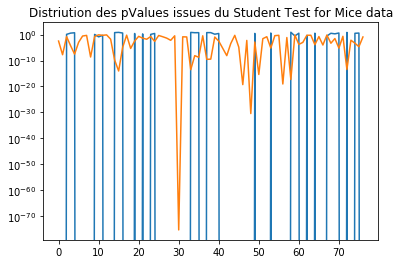

In [18]:
tTest_Mice=[]


for i in MiceNumericColumns:
    tTest_Mice.append(stats.ttest_ind(Mice[Mice['Genotype']=='Control'][i], Mice[Mice['Genotype']=='Ts65Dn'][i]))
   
print(tTest_Mice)

plt.figure()
plt.semilogy(tTest_Mice)
plt.title('Distriution des pValues issues du Student Test for Mice data')

tTest_Breast=[]

for i in BreastCancerNumericData:
    tTest_Breast.append(stats.ttest_ind(BreastCancerNumericData[BreastCancerNumericData[9]==2][i],
                                        BreastCancerNumericData[BreastCancerNumericData[9]==4][i]))
   
print(tTest_Breast)

plt.figure()
plt.semilogy(tTest_Breast)
plt.title('Distriution des pValues issues du  Student Test for Breast data')

8. Boxplot the distributions of the variables of the observations from class 1 and from class 2 using boxplot(). Are the plotted distributions coherent with the results obtained by stats.ttest ind()?

[0.50364388 0.51461708 0.50918309 ... 0.22869955 0.22124241 0.30262572]


IndexError: too many indices for array

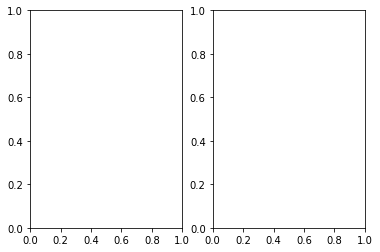

In [31]:
# PLot for the variable from Mice

data1=(Mice['DYRK1A_N'])
data2=(Mice['pCAMKII_N'])
data1=np.array(data1)
data2=np.array(data2)
print(data1)

fig, ax = plt.subplots(1, 2)

# data1 plot
ax[0, 0].boxplot(data1)
ax[0, 0].set_title('DYRK1A_N pvalue boxplot') 

# dara2 plot
ax[0, 1].boxplot(data2)
ax[0, 1].set_title('pCAMKII_N pvalue boxplot')

9. What are your conclusions? What variables are the most significant? What significance threshold (significance level) should be chosen? What multiple hypothesis adjustment method would you use? Why?

## AdaBoost

1. Test the AdaBoost classifier
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

MiceTrain = Mice.sample(frac=0.8)
XTrain = MiceTrain[MiceNumericColumns]
YTrain = MiceTrain["class"]

MiceTest = Mice.sample(frac=0.2)
XTest = Mice[MiceNumericColumns]
YTest = Mice["class"]

classifier = AdaBoostClassifier(n_estimators=1, learning_rate=1.0, algorithm='SAMME')
classifier.fit(XTrain, YTrain)
print(classifier.score(XTest, YTest))

2. Test various number of weak learners

The number of weak classifier is controlled by the parameter `n_estimators` 

In [ ]:
maxScore = 0
bestNumberOfEstimators = 0

for i in np.logspace(0, 3, dtype='int'):
    classifier = AdaBoostClassifier(n_estimators=i, learning_rate=1.0, algorithm='SAMME')
    classifier.fit(XTrain, YTrain)
    score = classifier.score(XTest, YTest)
    if score > maxScore:
        maxScore = score
        bestNumberOfEstimators = i

print(maxScore, bestNumberOfEstimators)

3. Run the AdaBoost on a 2-dimensional problem and analyse the class boundary
http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# TODO: Construct dataset X1 and X2 having each two classes X1 represents Mice & X2 represents BreastCancer
#X1 = Mice[NumericColumns]
#y1 = Mice["class"]
#X2 = BreastCancer[]
#y2 = BreastCancer[]

X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

4. Is AdaBoost a linear or a non-linear classifier?

AdaBoost, is a Machine Learning classifier based on Boosting method which is a linear combination of weak classifiers.

So, it's a linear classifier, if and only if, all of the weak classifiers utilized are linear, which is the case in AdaBoost implementation.


More information according to the Wikipedia article https://en.wikipedia.org/wiki/AdaBoost:

> Boosting is a form of linear regression in which the features of each sample $x_i$ are the outputs of some weak learner $h$ applied to $x_i$. Specifically, in the case where all weak learners are known a priori, AdaBoost corresponds to a single iteration of the backfitting algorithm in which the smoothing splines are the minimizers of $$\sum_{i=1}^n e^{-Y_i \hat\mu(x_i)} + \infty \int_{x_1}^{x_n} \hat\mu''(x)^2 \,dx$$, that is: $\hat\mu_i$ fits an exponential cost function and is linear with respect to the observation. Thus, boosting is a specific type of linear regression.